# DAP Model from 3/1/2012 - 3/29/2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/UANDAP.csv")
mar12on = data[['Date', 'Dollar','Crude','Corn','Gas','DAP']]
mar12on = mar12on.dropna()
mar12onnew = np.array(mar12on)
mar12onnew = pd.DataFrame(mar12onnew)
mar12onnew.columns = ['Date','Dollar','Crude','Corn','Gas','DAP']
mar12onnew[279:290]

,Date,Dollar,Crude,Corn,Gas,DAP
279,4/11/2013,82.247,93.85,633.5,4.179,450
280,4/12/2013,82.311,91.61,641.25,4.261,450
281,4/15/2013,82.417,89.03,628,4.168,450
282,4/16/2013,81.749,89.03,640.75,4.188,443
283,4/17/2013,82.684,86.97,641.25,4.243,439
284,4/18/2013,82.559,88,629.75,4.432,431
285,4/19/2013,82.714,88.27,633,4.437,433
286,4/22/2013,82.676,89.19,623.5,4.298,434
287,4/23/2013,83.048,89.46,614,4.278,427
288,4/24/2013,83.048,91.69,618.25,4.203,429


In [2]:
#Convert to proper date form
from datetime import datetime
mar12onnew['Date'] = pd.to_datetime(mar12onnew['Date'])
date = mar12onnew['Date']
mar12onnew.dtypes

Date      datetime64[ns]
Dollar            object
Crude             object
Corn              object
Gas               object
DAP               object
dtype: object

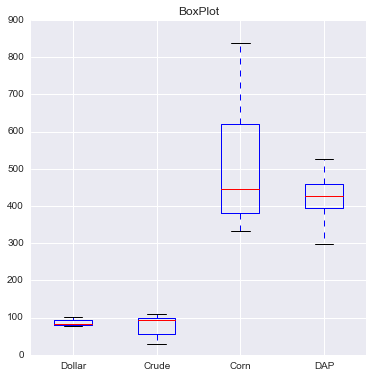

In [3]:
plt.show(mar12on[['Dollar','Crude','Corn','DAP']].plot(kind='box',figsize=(6,6),title=('BoxPlot')))

In [4]:
mar12on.describe()

,Dollar,Crude,Corn,Gas,DAP
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,85.997733,80.684886,500.393744,3.363142,424.135055
std,7.146868,23.826505,140.214722,0.796476,52.764073
min,78.709000,28.350000,333.500000,1.767000,294.000000
25%,80.327500,56.700000,382.125000,2.726000,394.000000
50%,82.318000,92.460000,446.500000,3.472000,426.000000
75%,94.584500,98.555000,619.500000,3.974500,460.000000
max,100.330000,109.520000,838.750000,5.465000,526.000000


In [5]:
mar12on.corr()

,Dollar,Crude,Corn,Gas,DAP
Dollar,1.000000,-0.956502,-0.595830,-0.633226,-0.468210
Crude,-0.956502,1.000000,0.512199,0.657584,0.411861
Corn,-0.595830,0.512199,1.000000,0.086803,0.690035
Gas,-0.633226,0.657584,0.086803,1.000000,0.127638
DAP,-0.468210,0.411861,0.690035,0.127638,1.000000


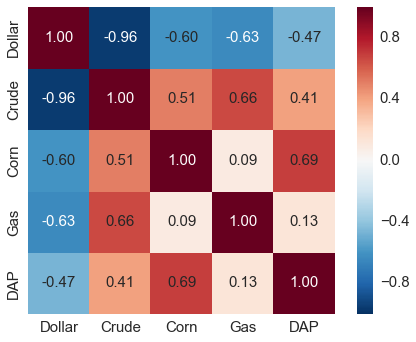

In [6]:
cols= ['Dollar','Crude','Corn','Gas','DAP']
cm = np.corrcoef(mar12on[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()
#only corn is correlated to DAP, crude and dollar highly correlated so will get rid of one in mlr model

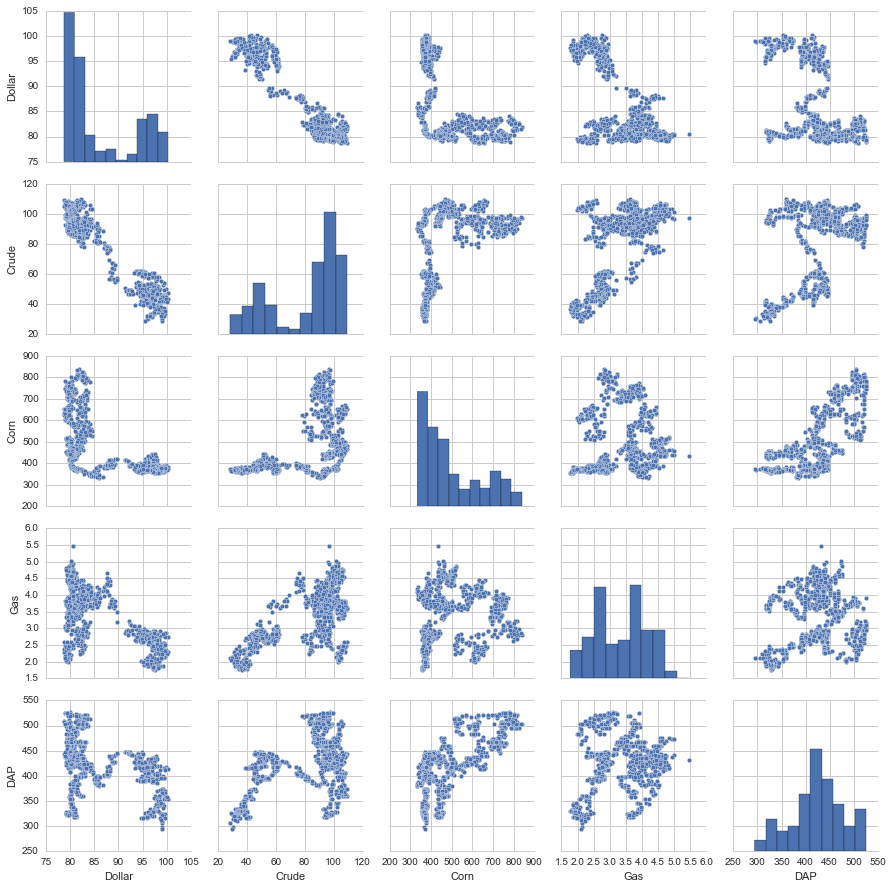

In [7]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(mar12on, size=2.5);
plt.show()

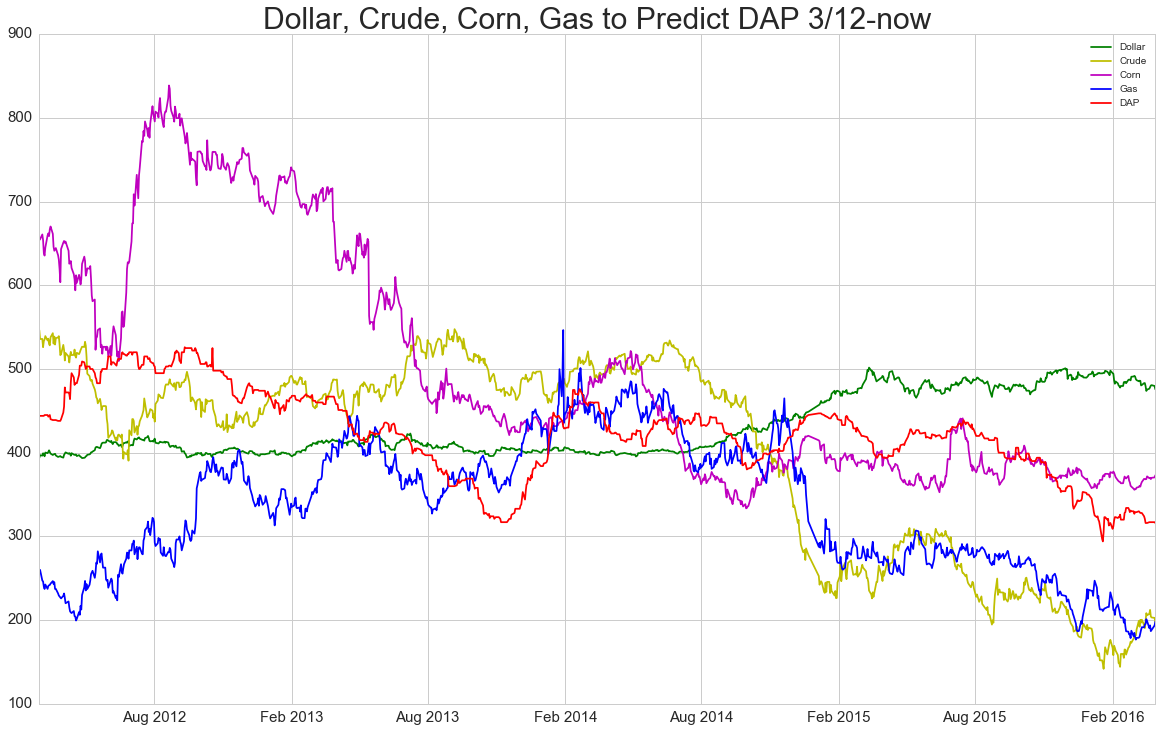

In [8]:
x = date
y1 = (mar12on['Dollar'])*5
y2 = (mar12on['Crude'])*5
y3 = (mar12on['Corn'])
y4 = (mar12on['Gas'])*100
y5 = (mar12on['DAP'])
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'y')
ax.plot(x,y3,'m')
ax.plot(x,y4,'b')
ax.plot(x,y5,'r')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Dollar, Crude, Corn, Gas to Predict DAP 3/12-now', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()

### Look at different MLR's Since Different X variables are highly correlated to each other

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = mar12on[['Dollar','Crude','Corn','Gas']]
Y = mar12on[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#pretty bad MLR need to find variables that are more correlated with DAP

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     232.9
Date:                Thu, 31 Mar 2016   Prob (F-statistic):          2.31e-141
Time:                        11:28:25   Log-Likelihood:                -5091.0
No. Observations:                1007   AIC:                         1.019e+04
Df Residuals:                    1002   BIC:                         1.022e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        330.7112     73.576      4.495      0.000       186.331   475.091
Dollar        -0.4309      0.651     -0.662      0.508        -1.708     0.846
Crude         -0.0029      0.180     -0.016      0.987        -0.356     0.350
Corn           0.2457      0.012     20.116      0.000         0.222     0.270
Gas            2.3098      2.222      1.040      0.299        -2.050     6.670
==============================================================================
Omnibus:                       28.931   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.391
Skew:                          -0.375   Prob(JB):                     6.84e-07
Kurtosis:                       2.664   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


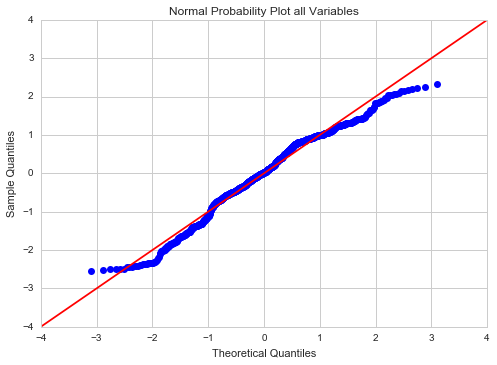

In [10]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot all Variables')
fig.show() #skewed

In [11]:
#fit a OLS model with dollar, corn, gas see how R^2 changes
X = mar12on[['Dollar','Corn','Gas']]
Y = mar12on[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()#so looking at this, dollar pretty much masks crude and R^2 actually didn't change at all

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     310.8
Date:                Thu, 31 Mar 2016   Prob (F-statistic):          1.20e-142
Time:                        11:29:58   Log-Likelihood:                -5091.0
No. Observations:                1007   AIC:                         1.019e+04
Df Residuals:                    1003   BIC:                         1.021e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        329.6808     36.353      9.069      0.000       258.344   401.017
Dollar        -0.4216      0.304     -1.386      0.166        -1.019     0.175
Corn           0.2457      0.012     20.397      0.000         0.222     0.269
Gas            2.3050      2.201      1.047      0.295        -2.014     6.624
==============================================================================
Omnibus:                       28.892   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.338
Skew:                          -0.375   Prob(JB):                     7.02e-07
Kurtosis:                       2.663   Cond. No.                     1.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


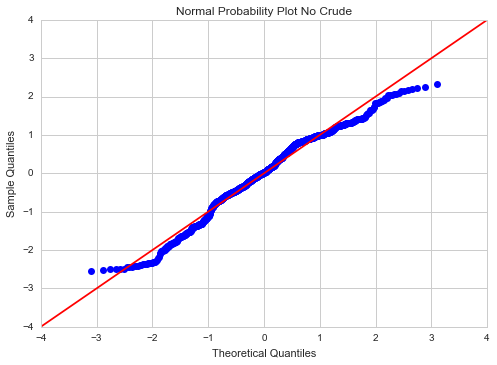

In [12]:
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot No Crude')
fig.show() #more skewed

In [13]:
#fit a OLS model with crude, corn, gas see how R^2 changes
X = mar12on[['Crude','Corn','Gas']]
Y = mar12on[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() #again nothing changed much not even the R^2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     310.5
Date:                Thu, 31 Mar 2016   Prob (F-statistic):          1.50e-142
Time:                        11:31:09   Log-Likelihood:                -5091.2
No. Observations:                1007   AIC:                         1.019e+04
Df Residuals:                    1003   BIC:                         1.021e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        282.2013      6.702     42.104      0.000       269.049   295.354
Crude          0.1023      0.084      1.217      0.224        -0.063     0.267
Corn           0.2495      0.011     23.098      0.000         0.228     0.271
Gas            2.6313      2.168      1.214      0.225        -1.622     6.885
==============================================================================
Omnibus:                       26.069   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.747
Skew:                          -0.341   Prob(JB):                     4.23e-06
Kurtosis:                       2.646   Cond. No.                     3.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


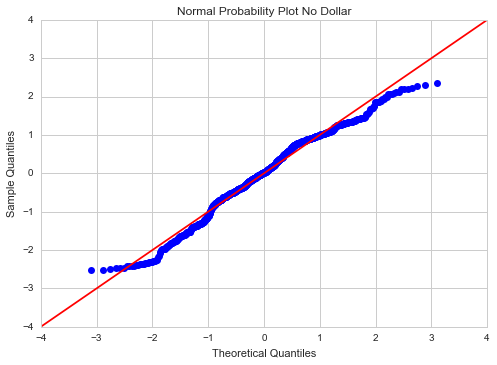

In [14]:
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot No Dollar')
fig.show() #pretty much the same

In [15]:
#fit a OLS model with dollar, crude, corn see how R^2 changes
X = mar12on[['Dollar','Crude','Corn']]
Y = mar12on[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() #again barely changed R^2, don't even need gas

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     310.1
Date:                Thu, 31 Mar 2016   Prob (F-statistic):          2.06e-142
Time:                        11:34:51   Log-Likelihood:                -5091.5
No. Observations:                1007   AIC:                         1.019e+04
Df Residuals:                    1003   BIC:                         1.021e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        351.9401     70.688      4.979      0.000       213.227   490.654
Dollar        -0.5787      0.635     -0.911      0.362        -1.825     0.668
Crude          0.0221      0.178      0.124      0.901        -0.327     0.372
Corn           0.2402      0.011     21.842      0.000         0.219     0.262
==============================================================================
Omnibus:                       34.625   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.812
Skew:                          -0.423   Prob(JB):                     2.76e-08
Kurtosis:                       2.662   Cond. No.                     3.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#fit a OLS model with corn see how R^2 changes
X = mar12on[['Corn']]
Y = mar12on[['DAP']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() #so pretty much can just use corn, but no models are good

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAP   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     913.5
Date:                Thu, 31 Mar 2016   Prob (F-statistic):          2.91e-143
Time:                        11:35:55   Log-Likelihood:                -5096.4
No. Observations:                1007   AIC:                         1.020e+04
Df Residuals:                    1005   BIC:                         1.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        294.1996      4.465     65.897      0.000       285.439   302.960
Corn           0.2597      0.009     30.224      0.000         0.243     0.277
==============================================================================
Omnibus:                       31.141   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.863
Skew:                          -0.364   Prob(JB):                     5.40e-07
Kurtosis:                       2.602   Cond. No.                     1.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### RDF models

In [18]:
#initially need to say what X and y are and the train/test split 
#for the definition in the next cell to find best parameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = mar12on[['Dollar','Crude','Corn','Gas']].values
y = mar12on['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [19]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on DAP data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [21]:
#do multiple times to see what parameters are the best
rdf_model_DAPall = fit_predict_model(X_train,y_train)
print (rdf_model_DAPall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [22]:
X = mar12on[['Dollar','Crude','Corn','Gas']].values
y = mar12on['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_) #corn and gas most important, interesting since gas wasn't very important in mlr

MSE train: 39.763, test: 187.071
R^2 train: 0.986, test: 0.931
[ 0.04489557  0.05470894  0.61012747  0.29026802]


In [23]:
#comparing the different models and adding to table
uan_predicted = forest.predict(X)
uan_predicted = pd.DataFrame(uan_predicted)
mar12onnew['Predicted_DAP_RDF'] = uan_predicted
rdf_error = (abs(mar12onnew['Predicted_DAP_RDF'] - mar12onnew['DAP'])/mar12onnew['DAP'])*100
mar12onnew['RDF_Error'] = rdf_error

#all variables included
mlr_predicted = 330.7112 - (mar12onnew['Dollar']*0.4309) - (mar12onnew['Crude']*0.0029) + (mar12onnew['Corn']*0.2457) + (mar12onnew['Gas']*2.3098)  
mar12onnew['Predicted_DAP_MLR'] = mlr_predicted
mlr_error = (abs(mar12onnew['Predicted_DAP_MLR'] - mar12onnew['DAP'])/mar12onnew['DAP'])*100
mar12onnew['MLR_Error'] = mlr_error

#mlr model without crude
mlr_predicted_nocrude = 329.6808 - (mar12onnew['Dollar']*0.4216) + (mar12onnew['Corn']*0.2457) + (mar12onnew['Gas']*2.3050)  
mar12onnew['Predicted_DAP_MLR_NoCrude'] = mlr_predicted_nocrude
mlr_error_nocrude = (abs(mar12onnew['Predicted_DAP_MLR_NoCrude'] - mar12onnew['DAP'])/mar12onnew['DAP'])*100
mar12onnew['MLR_Error_NoCrude'] = mlr_error_nocrude

#mlr model without dollar
mlr_predicted_nodollar = 282.2013 + (mar12onnew['Crude']*0.1023) + (mar12onnew['Corn']*0.2495) + (mar12onnew['Gas']*2.6313)  
mar12onnew['Predicted_DAP_MLR_No$'] = mlr_predicted_nodollar
mlr_error_nodollar = (abs(mar12onnew['Predicted_DAP_MLR_No$'] - mar12onnew['DAP'])/mar12onnew['DAP'])*100
mar12onnew['MLR_Error_No$'] = mlr_error_nodollar

#mlr model without gas
mlr_predicted_nogas = 351.9401 - (mar12onnew['Dollar']*0.5787) + (mar12onnew['Crude']*0.0221) + (mar12onnew['Corn']*.2402)  
mar12onnew['Predicted_DAP_MLR_NoGas'] = mlr_predicted_nogas
mlr_error_nogas = (abs(mar12onnew['Predicted_DAP_MLR_NoGas'] - mar12onnew['DAP'])/mar12onnew['DAP'])*100
mar12onnew['MLR_Error_NoGas'] = mlr_error_nogas

#mlr model only corn
lr_predicted_onlycorn = 294.1996 + (mar12onnew['Corn']*0.2597)
mar12onnew['Predicted_DAP_LR_OnlyCorn'] = lr_predicted_onlycorn
lr_error_onlycorn = (abs(mar12onnew['Predicted_DAP_LR_OnlyCorn'] - mar12onnew['DAP'])/mar12onnew['DAP'])*100
mar12onnew['MLR_Error_OnlyCorn'] = lr_error_onlycorn

print("Average RDF error is: %.3f" % (rdf_error.mean()))  
print("Average MLR error is: %.3f" % (mlr_error.mean()))
print("Average MLR error no crude is: %.3f" % (mlr_error_nocrude.mean()))
print("Average MLR error no dollar is: %.3f" % (mlr_error_nodollar.mean()))
print("Average MLR error no gas is: %.3f" % (mlr_error_nogas.mean()))
print("Average LR error only corn is: %.3f" % (lr_error_onlycorn.mean()))
mar12onnew

Average RDF error is: 1.321
Average MLR error is: 7.652
Average MLR error no crude is: 7.652
Average MLR error no dollar is: 7.649
Average MLR error no gas is: 7.674
Average LR error only corn is: 7.698


,Date,Dollar,Crude,Corn,Gas,DAP,Predicted_DAP_RDF,RDF_Error,Predicted_DAP_MLR,MLR_Error,Predicted_DAP_MLR_NoCrude,MLR_Error_NoCrude,Predicted_DAP_MLR_No$,MLR_Error_No$,Predicted_DAP_MLR_NoGas,MLR_Error_NoGas,Predicted_DAP_LR_OnlyCorn,MLR_Error_OnlyCorn
0,2012-03-01,78.789,109.27,654,2.579,444,446.315302,0.521464,463.089,4.2993,463.096,4.30085,463.339,4.35557,465.851,4.9213,464.043,4.51428
1,2012-03-02,79.403,107.17,655,2.6,444,445.235159,0.278189,463.125,4.30735,463.131,4.30878,463.429,4.37583,465.689,4.88492,464.303,4.57277
2,2012-03-05,79.3,107.18,660.75,2.472,444,445.290159,0.290576,464.286,4.56894,464.292,4.57031,464.528,4.62331,467.13,5.20946,465.796,4.90909
3,2012-03-06,79.866,105.21,654,2.462,444,463.227099,4.33043,462.366,4.13657,462.372,4.13784,462.616,4.19269,465.138,4.76072,464.043,4.51428
4,2012-03-07,79.712,106.65,638.75,2.4,444,445.247159,0.280892,458.538,3.27442,458.547,3.27637,458.795,3.33217,461.595,3.96295,460.083,3.62229
5,2012-03-08,79.139,107.06,635.5,2.372,445,442.028667,0.667715,457.921,2.90358,457.926,2.90463,457.952,2.91061,461.155,3.63045,459.239,3.19976
6,2012-03-09,80.041,107.87,645,2.425,445,441.845968,0.708771,459.986,3.36775,460.002,3.37115,460.545,3.49321,462.933,4.02996,461.706,3.75418
7,2012-03-12,79.89,106.84,659.5,2.373,445,445.026857,0.00603531,463.497,4.15664,463.508,4.15912,463.92,4.25177,466.481,4.82715,465.472,4.60039
8,2012-03-13,80.193,107.24,662,2.408,443,444.609159,0.363241,464.06,4.75405,464.075,4.7574,464.677,4.89326,466.915,5.39838,466.121,5.21919
9,2012-03-14,80.565,105.95,658.75,2.416,444,447.609659,0.812986,463.124,4.30717,463.138,4.31044,463.755,4.4494,465.89,4.93027,465.277,4.79211


### Now going to use RDF top 2 features, RDF no crude, RDF no dollar, only corn

In [24]:
#top 2, gas and corn
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = mar12on[['Corn','Gas']].values
y = mar12on['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [25]:
def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on dap data"""
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()
    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}
    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
        # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
        # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [28]:
rdf_model_DAPtop2 = fit_predict_model(X_train,y_train)
print (rdf_model_DAPtop2.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [29]:
#top 2
X = mar12on[['Corn','Gas']].values
y = mar12on['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 87.412, test: 288.750
R^2 train: 0.969, test: 0.894
[ 0.65508266  0.34491734]


In [31]:
#adding top2 rdf to table
uan_predicted2 = forest.predict(X)
uan_predicted2 = pd.DataFrame(uan_predicted2)
mar12onnew['Predicted_DAPTop2_RDF'] = uan_predicted2
rdf_error_top2 = (abs(mar12onnew['Predicted_DAPTop2_RDF'] - mar12onnew['DAP'])/mar12onnew['DAP'])*100
mar12onnew['RDF_DAPTop2_Error'] = rdf_error_top2
print("Average RDF top2 error is: %.3f" % (rdf_error_top2.mean()))
mar12onnew

Average RDF top2 error is: 1.974


,Date,Dollar,Crude,Corn,Gas,DAP,Predicted_DAP_RDF,RDF_Error,Predicted_DAP_MLR,MLR_Error,Predicted_DAP_MLR_NoCrude,MLR_Error_NoCrude,Predicted_DAP_MLR_No$,MLR_Error_No$,Predicted_DAP_MLR_NoGas,MLR_Error_NoGas,Predicted_DAP_LR_OnlyCorn,MLR_Error_OnlyCorn,Predicted_DAPTop2_RDF,RDF_DAPTop2_Error
0,2012-03-01,78.789,109.27,654,2.579,444,446.315302,0.521464,463.089,4.2993,463.096,4.30085,463.339,4.35557,465.851,4.9213,464.043,4.51428,453.327832,2.10086
1,2012-03-02,79.403,107.17,655,2.6,444,445.235159,0.278189,463.125,4.30735,463.131,4.30878,463.429,4.37583,465.689,4.88492,464.303,4.57277,457.266415,2.98793
2,2012-03-05,79.3,107.18,660.75,2.472,444,445.290159,0.290576,464.286,4.56894,464.292,4.57031,464.528,4.62331,467.13,5.20946,465.796,4.90909,455.694801,2.63396
3,2012-03-06,79.866,105.21,654,2.462,444,463.227099,4.33043,462.366,4.13657,462.372,4.13784,462.616,4.19269,465.138,4.76072,464.043,4.51428,456.306785,2.7718
4,2012-03-07,79.712,106.65,638.75,2.4,444,445.247159,0.280892,458.538,3.27442,458.547,3.27637,458.795,3.33217,461.595,3.96295,460.083,3.62229,442.672319,0.299027
5,2012-03-08,79.139,107.06,635.5,2.372,445,442.028667,0.667715,457.921,2.90358,457.926,2.90463,457.952,2.91061,461.155,3.63045,459.239,3.19976,441.682607,0.745482
6,2012-03-09,80.041,107.87,645,2.425,445,441.845968,0.708771,459.986,3.36775,460.002,3.37115,460.545,3.49321,462.933,4.02996,461.706,3.75418,443.687111,0.295031
7,2012-03-12,79.89,106.84,659.5,2.373,445,445.026857,0.00603531,463.497,4.15664,463.508,4.15912,463.92,4.25177,466.481,4.82715,465.472,4.60039,444.070181,0.208948
8,2012-03-13,80.193,107.24,662,2.408,443,444.609159,0.363241,464.06,4.75405,464.075,4.7574,464.677,4.89326,466.915,5.39838,466.121,5.21919,444.467365,0.331234
9,2012-03-14,80.565,105.95,658.75,2.416,444,447.609659,0.812986,463.124,4.30717,463.138,4.31044,463.755,4.4494,465.89,4.93027,465.277,4.79211,444.267365,0.0602173


In [32]:
#no crude
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = mar12on[['Dollar','Corn','Gas']].values
y = mar12on['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [33]:
def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on dap data"""
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()
    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}
    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
        # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
        # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [38]:
rdf_model_DAPnoCrude = fit_predict_model(X_train,y_train)
print (rdf_model_DAPnoCrude.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [39]:
#no crude rdf
X = mar12on[['Dollar','Corn','Gas']].values
y = mar12on['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)#corn most important, dollar least

MSE train: 45.240, test: 220.247
R^2 train: 0.984, test: 0.919
[ 0.05927629  0.63381749  0.30690621]


In [40]:
#adding no crude rdf to table
uan_predicted3 = forest.predict(X)
uan_predicted3 = pd.DataFrame(uan_predicted3)
mar12onnew['Predicted_DAPnoCrude_RDF'] = uan_predicted3
rdf_error_nocrude = (abs(mar12onnew['Predicted_DAPnoCrude_RDF'] - mar12onnew['DAP'])/mar12onnew['DAP'])*100
mar12onnew['RDF_DAPnoCrude_Error'] = rdf_error_nocrude
print("Average RDF no crude error is: %.3f" % (rdf_error_nocrude.mean()))
mar12onnew

Average RDF no crude error is: 1.487


,Date,Dollar,Crude,Corn,Gas,DAP,Predicted_DAP_RDF,RDF_Error,Predicted_DAP_MLR,MLR_Error,...,Predicted_DAP_MLR_No$,MLR_Error_No$,Predicted_DAP_MLR_NoGas,MLR_Error_NoGas,Predicted_DAP_LR_OnlyCorn,MLR_Error_OnlyCorn,Predicted_DAPTop2_RDF,RDF_DAPTop2_Error,Predicted_DAPnoCrude_RDF,RDF_DAPnoCrude_Error
0,2012-03-01,78.789,109.27,654,2.579,444,446.315302,0.521464,463.089,4.2993,...,463.339,4.35557,465.851,4.9213,464.043,4.51428,453.327832,2.10086,450.905989,1.5554
1,2012-03-02,79.403,107.17,655,2.6,444,445.235159,0.278189,463.125,4.30735,...,463.429,4.37583,465.689,4.88492,464.303,4.57277,457.266415,2.98793,456.719999,2.86486
2,2012-03-05,79.3,107.18,660.75,2.472,444,445.290159,0.290576,464.286,4.56894,...,464.528,4.62331,467.13,5.20946,465.796,4.90909,455.694801,2.63396,457.510707,3.04295
3,2012-03-06,79.866,105.21,654,2.462,444,463.227099,4.33043,462.366,4.13657,...,462.616,4.19269,465.138,4.76072,464.043,4.51428,456.306785,2.7718,459.796362,3.55774
4,2012-03-07,79.712,106.65,638.75,2.4,444,445.247159,0.280892,458.538,3.27442,...,458.795,3.33217,461.595,3.96295,460.083,3.62229,442.672319,0.299027,443.119694,0.198267
5,2012-03-08,79.139,107.06,635.5,2.372,445,442.028667,0.667715,457.921,2.90358,...,457.952,2.91061,461.155,3.63045,459.239,3.19976,441.682607,0.745482,440.203179,1.07794
6,2012-03-09,80.041,107.87,645,2.425,445,441.845968,0.708771,459.986,3.36775,...,460.545,3.49321,462.933,4.02996,461.706,3.75418,443.687111,0.295031,445.138889,0.031211
7,2012-03-12,79.89,106.84,659.5,2.373,445,445.026857,0.00603531,463.497,4.15664,...,463.92,4.25177,466.481,4.82715,465.472,4.60039,444.070181,0.208948,444.798961,0.0451772
8,2012-03-13,80.193,107.24,662,2.408,443,444.609159,0.363241,464.06,4.75405,...,464.677,4.89326,466.915,5.39838,466.121,5.21919,444.467365,0.331234,446.495281,0.789002
9,2012-03-14,80.565,105.95,658.75,2.416,444,447.609659,0.812986,463.124,4.30717,...,463.755,4.4494,465.89,4.93027,465.277,4.79211,444.267365,0.0602173,447.319192,0.747566


In [41]:
#no dollar
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = mar12on[['Crude','Corn','Gas']].values
y = mar12on['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [42]:
def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on dap data"""
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()
    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}
    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
        # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
        # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [48]:
rdf_model_DAPnoDollar = fit_predict_model(X_train,y_train)
print (rdf_model_DAPnoDollar.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [49]:
#no dollar rdf
X = mar12on[['Crude','Corn','Gas']].values
y = mar12on['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)#corn most important, crude least

MSE train: 43.253, test: 181.348
R^2 train: 0.985, test: 0.933
[ 0.07339922  0.6195698   0.30703098]


In [50]:
#adding no dollar rdf to table
dap_predicted4 = forest.predict(X)
dap_predicted4 = pd.DataFrame(dap_predicted4)
mar12onnew['Predicted_DAPno$_RDF'] = dap_predicted4
rdf_error_nodollar = (abs(mar12onnew['Predicted_DAPno$_RDF'] - mar12onnew['DAP'])/mar12onnew['DAP'])*100
mar12onnew['RDF_DAPno$_Error'] = rdf_error_nodollar
print("Average RDF no dollar error is: %.3f" % (rdf_error_nodollar.mean()))
mar12onnew

Average RDF no dollar error is: 1.377


,Date,Dollar,Crude,Corn,Gas,DAP,Predicted_DAP_RDF,RDF_Error,Predicted_DAP_MLR,MLR_Error,...,Predicted_DAP_MLR_NoGas,MLR_Error_NoGas,Predicted_DAP_LR_OnlyCorn,MLR_Error_OnlyCorn,Predicted_DAPTop2_RDF,RDF_DAPTop2_Error,Predicted_DAPnoCrude_RDF,RDF_DAPnoCrude_Error,Predicted_DAPno$_RDF,RDF_DAPno$_Error
0,2012-03-01,78.789,109.27,654,2.579,444,446.315302,0.521464,463.089,4.2993,...,465.851,4.9213,464.043,4.51428,453.327832,2.10086,450.905989,1.5554,444.010762,0.00242385
1,2012-03-02,79.403,107.17,655,2.6,444,445.235159,0.278189,463.125,4.30735,...,465.689,4.88492,464.303,4.57277,457.266415,2.98793,456.719999,2.86486,444.638619,0.143833
2,2012-03-05,79.3,107.18,660.75,2.472,444,445.290159,0.290576,464.286,4.56894,...,467.13,5.20946,465.796,4.90909,455.694801,2.63396,457.510707,3.04295,445.210048,0.272533
3,2012-03-06,79.866,105.21,654,2.462,444,463.227099,4.33043,462.366,4.13657,...,465.138,4.76072,464.043,4.51428,456.306785,2.7718,459.796362,3.55774,464.168630,4.54248
4,2012-03-07,79.712,106.65,638.75,2.4,444,445.247159,0.280892,458.538,3.27442,...,461.595,3.96295,460.083,3.62229,442.672319,0.299027,443.119694,0.198267,445.179422,0.265636
5,2012-03-08,79.139,107.06,635.5,2.372,445,442.028667,0.667715,457.921,2.90358,...,461.155,3.63045,459.239,3.19976,441.682607,0.745482,440.203179,1.07794,444.195374,0.180815
6,2012-03-09,80.041,107.87,645,2.425,445,441.845968,0.708771,459.986,3.36775,...,462.933,4.02996,461.706,3.75418,443.687111,0.295031,445.138889,0.031211,440.821088,0.939081
7,2012-03-12,79.89,106.84,659.5,2.373,445,445.026857,0.00603531,463.497,4.15664,...,466.481,4.82715,465.472,4.60039,444.070181,0.208948,444.798961,0.0451772,444.334946,0.14945
8,2012-03-13,80.193,107.24,662,2.408,443,444.609159,0.363241,464.06,4.75405,...,466.915,5.39838,466.121,5.21919,444.467365,0.331234,446.495281,0.789002,444.220660,0.275544
9,2012-03-14,80.565,105.95,658.75,2.416,444,447.609659,0.812986,463.124,4.30717,...,465.89,4.93027,465.277,4.79211,444.267365,0.0602173,447.319192,0.747566,445.308469,0.2947


In [51]:
#only corn
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = mar12on[['Corn']].values
y = mar12on['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [52]:
def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on dap data"""
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()
    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}
    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
        # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
        # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [61]:
rdf_model_DAPonlycorn = fit_predict_model(X_train,y_train)
print (rdf_model_DAPonlycorn.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [62]:
#only corn rdf
X = mar12on[['Corn']].values
y = mar12on['DAP'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
#such a bad model I am not even going to bother adding it to the table, lot worse than all other RDF models

MSE train: 1059.098, test: 1254.326
R^2 train: 0.623, test: 0.539


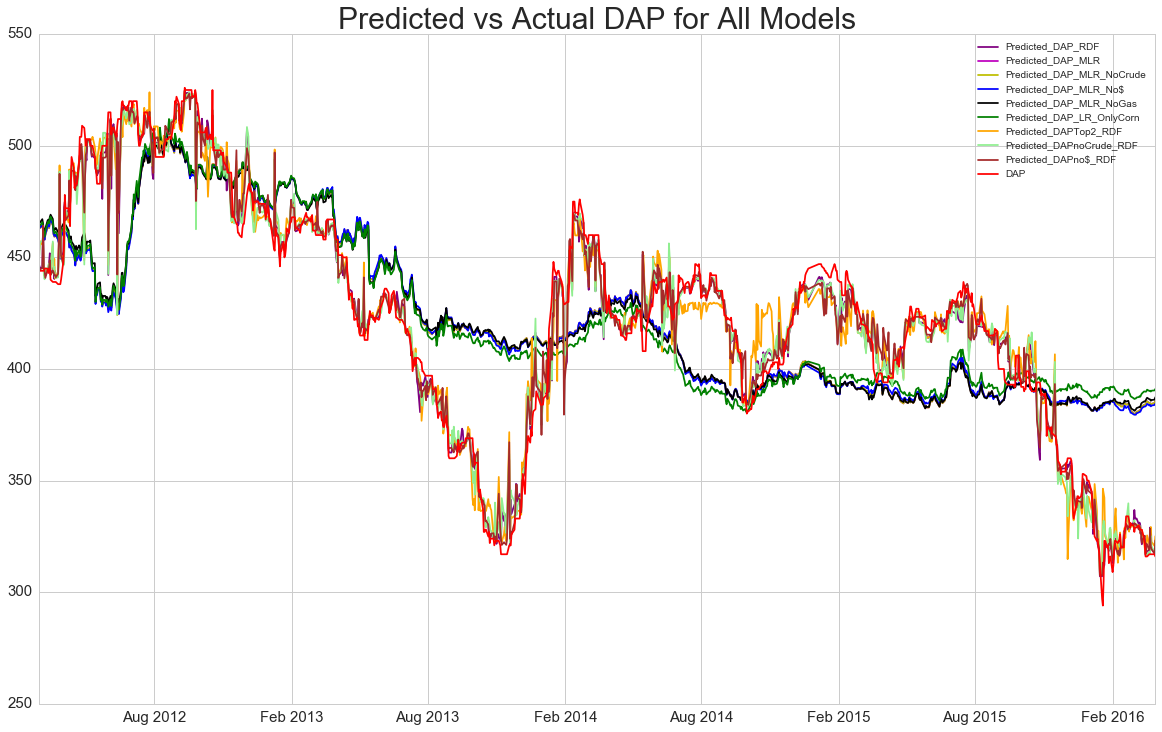

In [63]:
x = (mar12onnew['Date'])
y1 = (mar12onnew['Predicted_DAP_RDF'])
y2 = (mar12onnew['Predicted_DAP_MLR'])
y3 = (mar12onnew['Predicted_DAP_MLR_NoCrude'])
y4 = (mar12onnew['Predicted_DAP_MLR_No$'])
y5 = (mar12onnew['Predicted_DAP_MLR_NoGas'])
y6 = (mar12onnew['Predicted_DAP_LR_OnlyCorn'])
y7 = (mar12onnew['Predicted_DAPTop2_RDF'])
y8 = (mar12onnew['Predicted_DAPnoCrude_RDF'])
y9 = (mar12onnew['Predicted_DAPno$_RDF'])
y10 = (mar12onnew['DAP'])
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'purple')
ax.plot(x,y2,'m')
ax.plot(x,y3,'y')
ax.plot(x,y4,'b')
ax.plot(x,y5,'k')
ax.plot(x,y6,'g')
ax.plot(x,y7,'orange')
ax.plot(x,y8,'lightgreen')
ax.plot(x,y9,'brown')
ax.plot(x,y10,'r')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Predicted vs Actual DAP for All Models', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
plt.show()
#sort out which models you are interested in by '#'